<a href="https://colab.research.google.com/github/SOWMYAA-hub/Sentiment-Analysis-Project/blob/main/SENTIMENT_ANALYSIS_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
df = pd.read_csv('/content/sentimentdataset.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,15-01-2023 08:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [10]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])
df = df.dropna().drop_duplicates()

In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|#\S+|[^a-zA-Z\s]", "", text)
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df['Cleaned_Text'] = df['Text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
!pip install textblob
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Text'])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        23
     Neutral       0.53      0.91      0.67        58
    Positive       0.79      0.55      0.65        62

    accuracy                           0.61       143
   macro avg       0.44      0.49      0.44       143
weighted avg       0.56      0.61      0.55       143



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
!pip install nrclex
from nrclex import NRCLex

def detect_emotion(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

df['Emotions'] = df['Cleaned_Text'].apply(lambda x: detect_emotion(x))


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=8d38f6cf2558a931a23091f3e210772ec9e3ba161bc6caf514e1f73fb6b606fa
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [19]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
!pip install nrclex
from nrclex import NRCLex
import nltk
nltk.download('punkt_tab') # Download the missing resource

def detect_emotion(text):
    emotion = NRCLex(text)
    return emotion.top_emotions

df['Emotions'] = df['Cleaned_Text'].apply(lambda x: detect_emotion(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


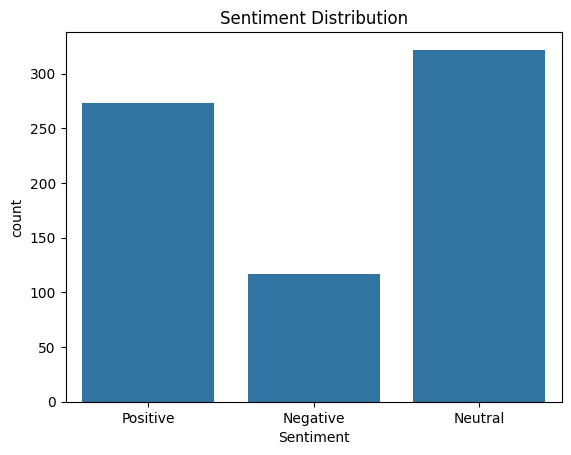

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()



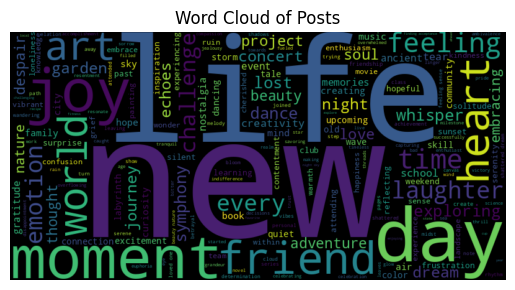

In [28]:
# WordCloud
!pip install wordcloud
from wordcloud import WordCloud

all_text = ' '.join(df['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Posts")
plt.show()

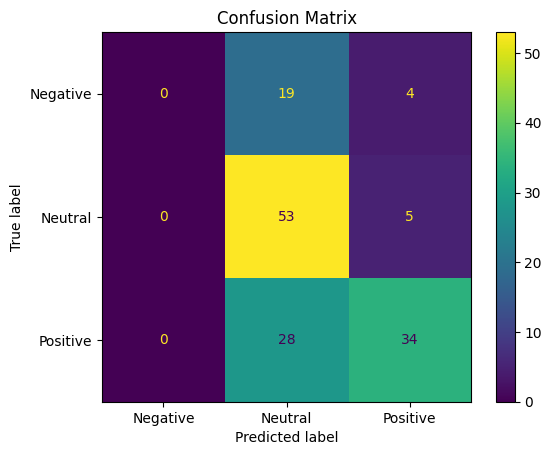

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


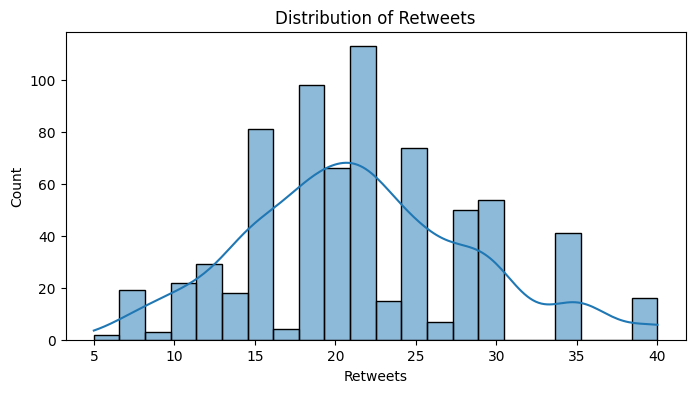

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Retweets'
plt.figure(figsize=(8,4))
sns.histplot(df['Retweets'], kde=True)
plt.title("Distribution of Retweets")
plt.show()


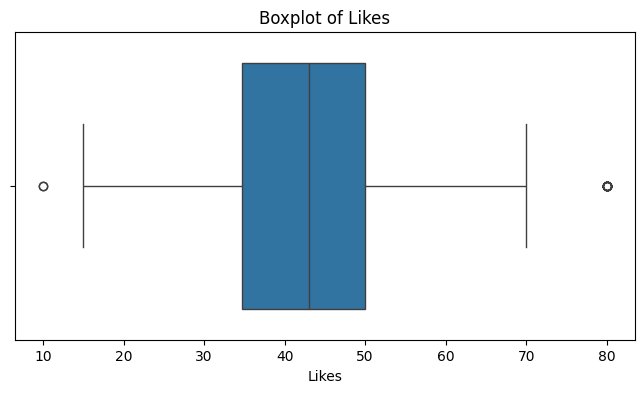

In [35]:
# Boxplot for 'Likes'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Likes'])
plt.title("Boxplot of Likes")
plt.show()

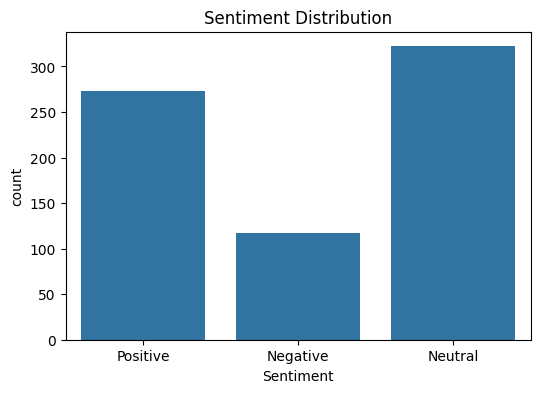

In [37]:
# Countplot for Sentiment
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


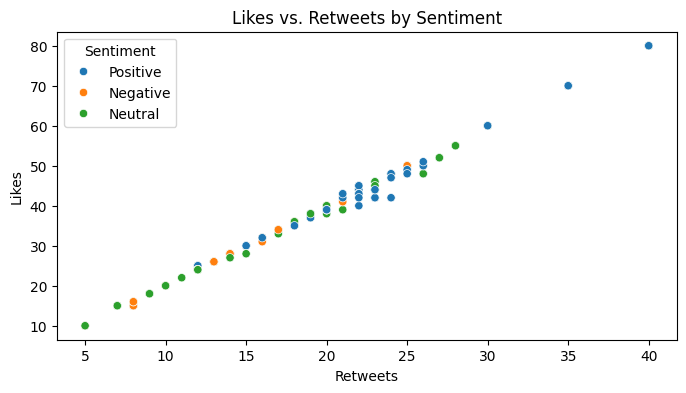

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Retweets', y='Likes', hue='Sentiment', data=df)
plt.title("Likes vs. Retweets by Sentiment")
plt.show()


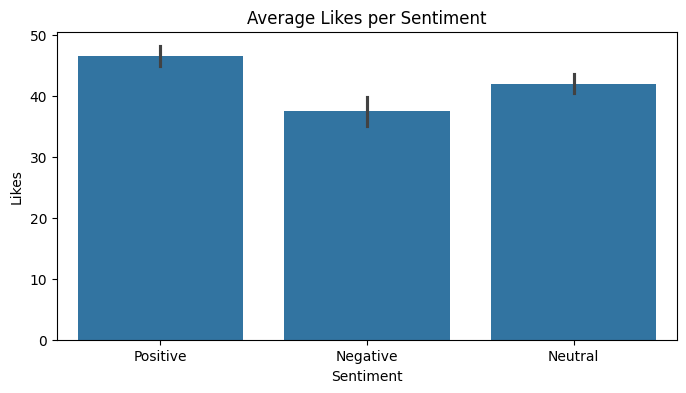

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(x='Sentiment', y='Likes', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Average Likes per Sentiment")
plt.show()